In [115]:
import pandas as pd
import matplotlib.pyplot as plt


In [116]:
import numpy as np
import seaborn as sns

In [117]:
data = pd.read_csv("D:\ML projects\Fraud_trans_detection\Fraud.csv")

In [118]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [120]:
data.shape

(6362620, 11)

In [121]:
#checking for missing values in data
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [122]:
#checking for duplicate values in data
data.duplicated().sum()

0

In [123]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [124]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
#     outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return lower,upper
    

In [125]:
feature = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(find_outliers_IQR(data[i]))

amount
(-279608.29125, 501719.33875)
oldbalanceOrg
(-160972.7625, 268287.9375)
newbalanceOrig
(-216387.615, 360646.025)
oldbalanceDest
(-1414555.06125, 2357591.76875)
newbalanceDest
(-1667863.875, 2779773.125)


In [126]:
#treatment of outliers (capping)
feature = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
for i in feature:
    l,u = find_outliers_IQR(data[i])
    data[i] = np.where(data[i]>u,u,
                      np.where(data[i]<l,l,data[i]))

In [127]:
#have cross check by describing data
data.describe()    

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.322667e+05,7.221247e+04,8.872275e+04,6.003940e+05,7.150404e+05,1.290820e-03,2.514687e-06
std,1.423320e+02,1.462368e+05,1.024141e+05,1.393412e+05,8.369711e+05,9.673665e+05,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017193e+05,2.682879e+05,3.606460e+05,2.357592e+06,2.779773e+06,1.000000e+00,1.000000e+00


In [128]:
###Data Visualization for each feature###

In [129]:
# 1.step feature...
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [130]:
#there are total 743 steps and has at least 2 occurances

In [131]:
# 2. type feature...
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [132]:
# type feature has 4 categories - CASH_OUT,'PAYMENT','CASH_IN','TRANSFER' and 'DEBIT'

Text(0, 0.5, 'Number of transactions')

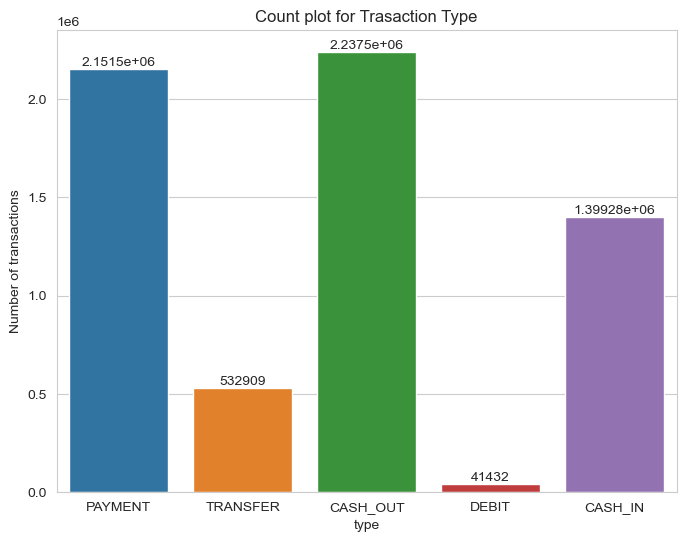

In [133]:
trans_type = sns.countplot(x='type', data=data)
for container in trans_type.containers:
    trans_type.bar_label(container)

plt.title('Count plot for Trasaction Type')
plt.ylabel('Number of transactions')

In [134]:
# The most number trascations made by 'CASH_OUT' type, followed by 'PAYMENT','CASH_IN','TRANSFER' and 'DEBIT'

In [135]:
# 3. amount feature...

Text(0.5, 1.0, 'Distrbution of amount')

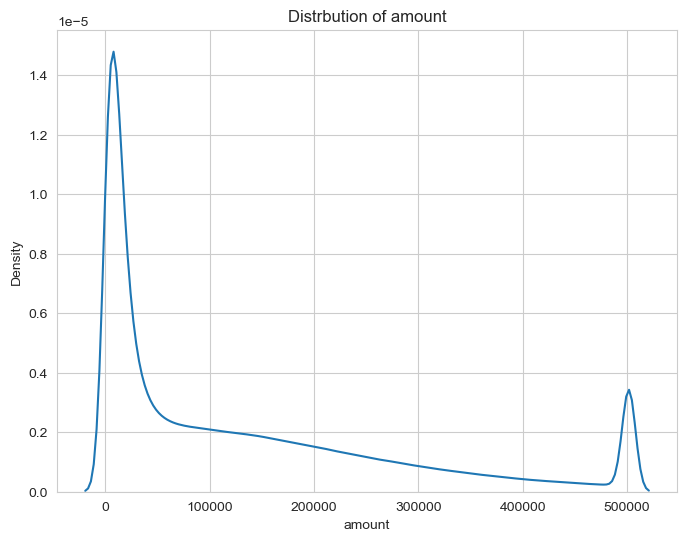

In [136]:
sns.kdeplot(data['amount'])
plt.title('Distrbution of amount')

In [137]:
#this distribution is right skewed 
# i.e. most values are around left tail of distribution
# means mean is greater than median.

In [138]:
# 4. nameOrig feature...

In [139]:
data['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [140]:
#there are total 6353307 customers initially and has max 3 occurances 

In [141]:
# 5. oldbalanceOrg feature...

Text(0.5, 1.0, 'Distrbution of amount')

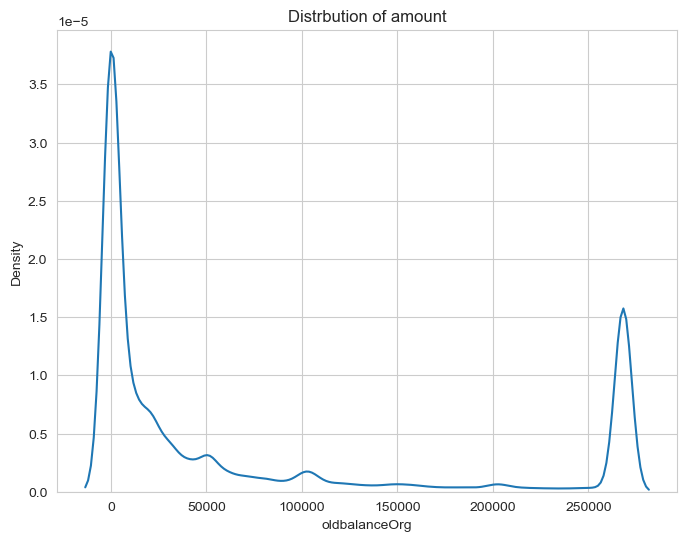

In [142]:
sns.kdeplot(data['oldbalanceOrg'])
plt.title('Distrbution of amount')

In [143]:
# balance before the transaction data of initial customers is right skewed.

In [144]:
# 6. newbalanceOrig feature...

Text(0.5, 1.0, 'Distrbution of amount')

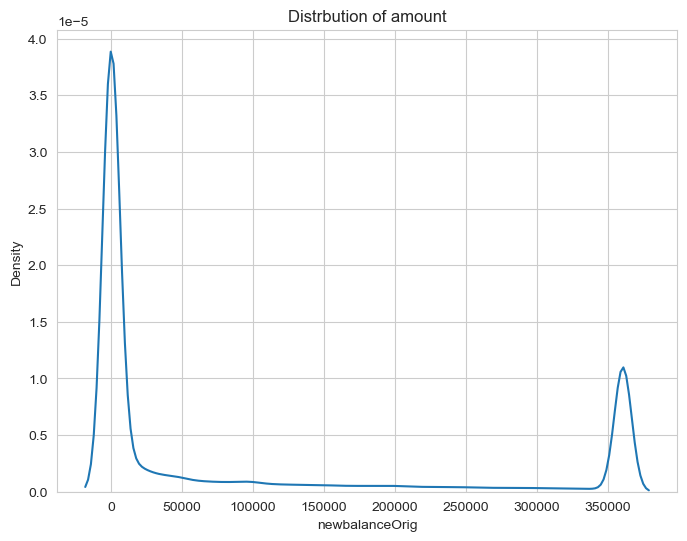

In [145]:
sns.kdeplot(data['newbalanceOrig'])
plt.title('Distrbution of amount')

In [146]:
# balance after the transaction data of initial customers is right skewed.

In [147]:
# 7. nameDest feature...

In [148]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [149]:
# there are total 2722362 recipients.

In [150]:
# 8. oldbalanceDest feature...

Text(0.5, 1.0, 'Distrbution of amount')

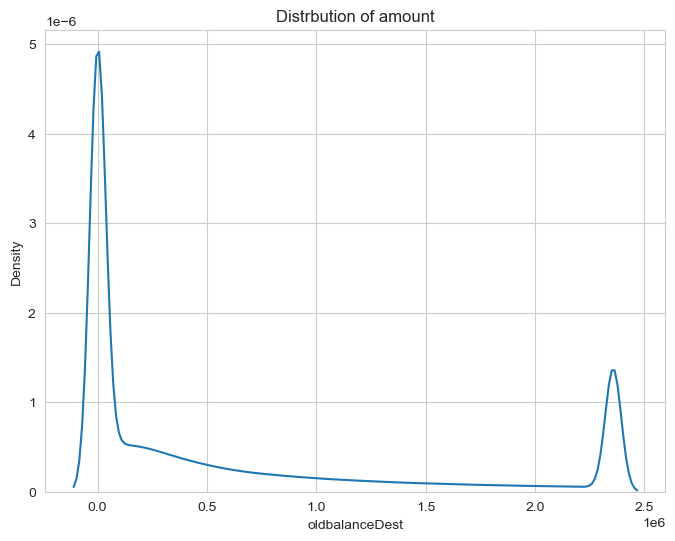

In [151]:
sns.kdeplot(data['oldbalanceDest'])
plt.title('Distrbution of amount')

In [152]:
# distribution of balance before transaction data of recipients is right skewed.

In [153]:
# 9. newbalanceDest feature...

Text(0.5, 1.0, 'Distrbution of amount')

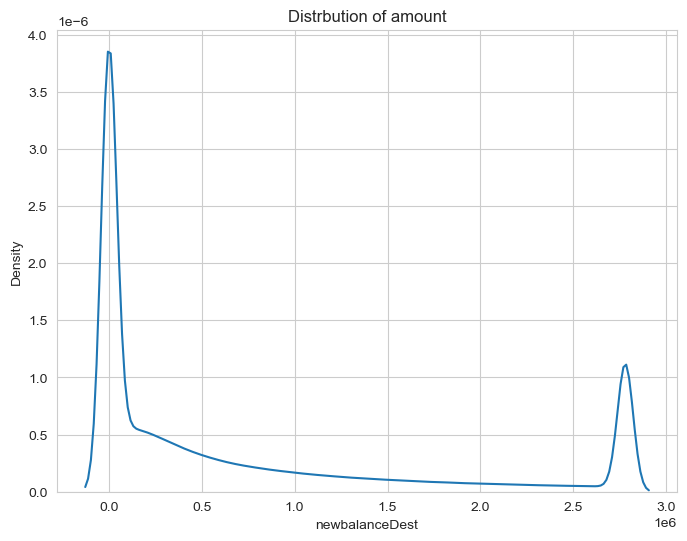

In [154]:
sns.kdeplot(data['newbalanceDest'])
plt.title('Distrbution of amount')

In [155]:
# distribution of balance after transaction data of recipients is right skewed.

In [156]:
#10. isFraud feature...

Text(0, 0.5, 'Number of transactions')

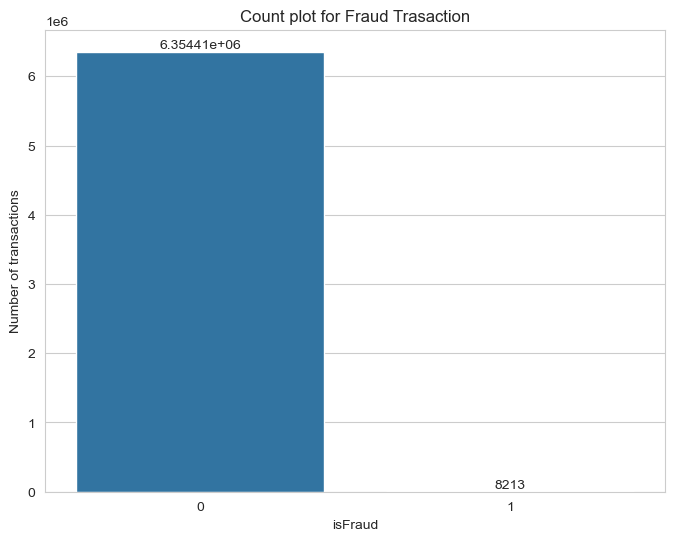

In [157]:
fraud_count = sns.countplot(x='isFraud', data=data)
for container in fraud_count.containers:
    fraud_count.bar_label(container)

plt.title('Count plot for Fraud Trasaction')
plt.ylabel('Number of transactions')

In [158]:
# there are very less number of fraud transctions than non-fraudulent one.

In [159]:
# relationship of type column with isFraud column 

In [160]:
type_fraud_result = pd.crosstab(index = data.type, columns = data.isFraud)
type_fraud_result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [161]:
# that shows only CASH_OUT and TRANSFER type of trasctions has fraud data. 

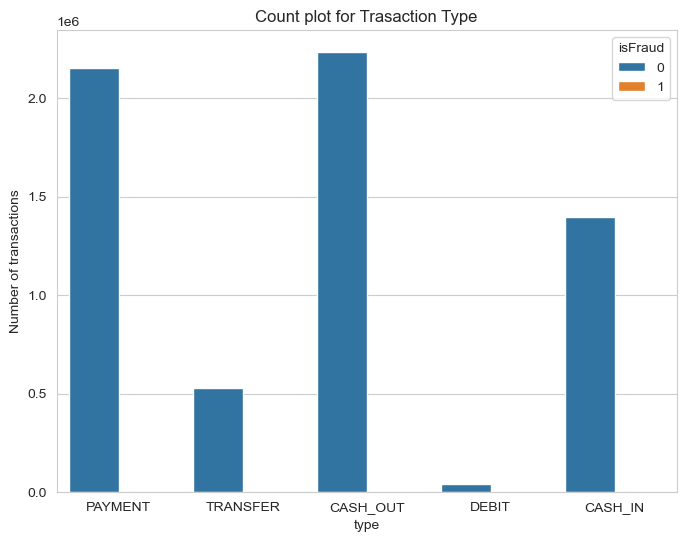

In [163]:
sns.countplot(x='type', data=data,hue = 'isFraud')
plt.title('Count plot for Trasaction Type')
plt.ylabel('Number of transactions')
plt.show()

In [164]:
# as CASH_OUT and TRANSFER type of trasctions are having fraud data 
# but of very less values i.e. 4116 and 4097 can't be seen clearly in plot

#so we can give here ylim 

(3000.0, 6000.0)

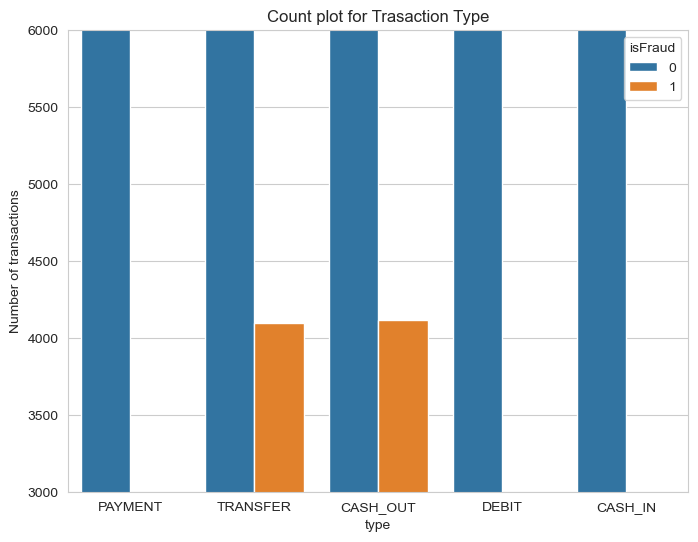

In [165]:
fraud_plot = sns.countplot(x='type', data=data,hue = 'isFraud')
plt.title('Count plot for Trasaction Type')
plt.ylabel('Number of transactions')
plt.ylim([3000,6000])

In [166]:
# calculating total percentage of fraud and non fraud transcations
type_fraud_result

# for CASH_OUT
cashOut_total_fraud = 4116/(2233384+4116)*100
transfer_total_fraud = 4097/(528812+4097)*100
print("Percentage of Fraud in Cash  out transction type: ",round(cashOut_total_fraud,2),"\n",
"Percentage of Fraud in Transfer transction type: " ,round(transfer_total_fraud,2))

Percentage of Fraud in Cash  out transction type:  0.18 
 Percentage of Fraud in Transfer transction type:  0.77


<Axes: title={'center': 'amount'}, xlabel='isFraud'>

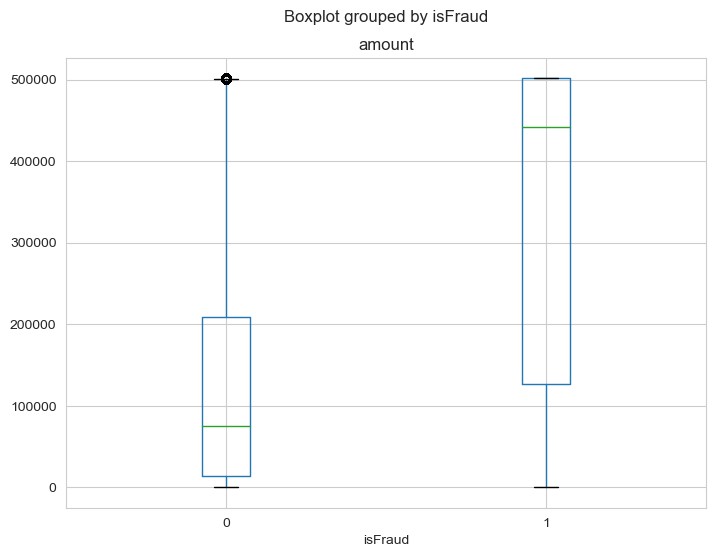

In [167]:
data.boxplot(column='amount', by='isFraud')

In [168]:
# here Fraud amount transaction range is between 1.3-5 lakh

In [169]:
#isFlaggedFraud denotes the transactions that are assumed to be fraud

data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [170]:
#checking how many values assumed and flagged as fraud is actually correct
flagged_fraud_records = data[(data.isFraud==1) & (data.isFlaggedFraud==1)]
flagged_fraud_records


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,501719.33875,C728984460,268287.9375,360646.025,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,501719.33875,C1100582606,268287.9375,360646.025,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,501719.33875,C1035541766,268287.9375,360646.025,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,501719.33875,C908544136,268287.9375,360646.025,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,501719.33875,C689608084,268287.9375,360646.025,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,501719.33875,C452586515,268287.9375,360646.025,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,501719.33875,C193696150,268287.9375,360646.025,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22000,C1684585475,268287.9375,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,501719.33875,C786455622,268287.9375,360646.025,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,501719.33875,C19004745,268287.9375,360646.025,C1806199534,0.0,0.0,1,1


In [171]:
flagged_fraud_records.shape


(16, 11)

In [ ]:
#i.e all the records which were flagged as fraud are correct

C:\Users\DELL\AppData\Local\Temp\ipykernel_4300\1113131929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

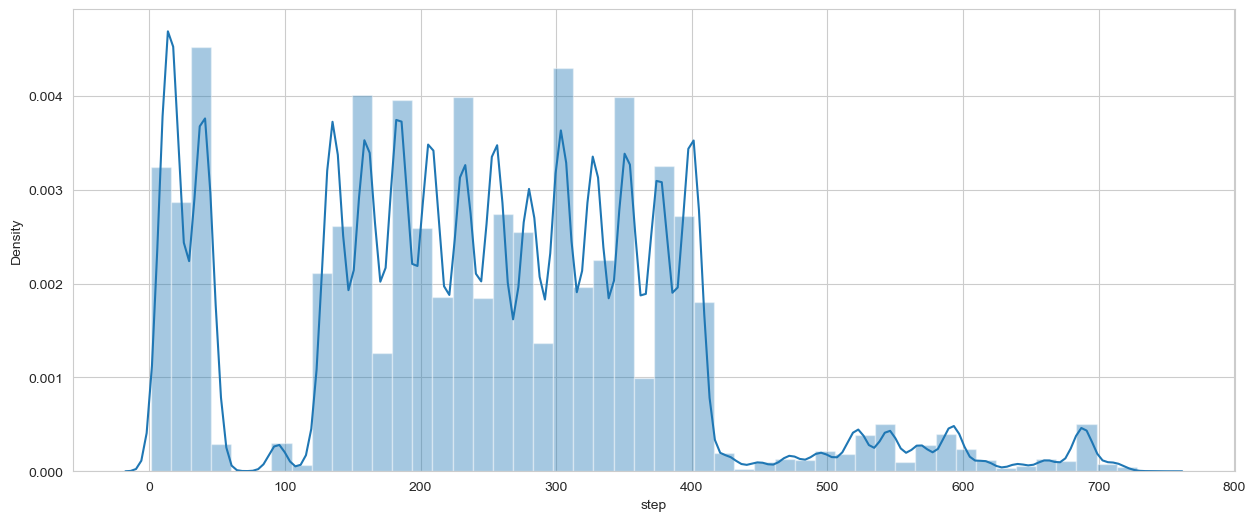

In [172]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

In [ ]:
# step max distribution is between 120 to 400 

In [ ]:
#calculate correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_4300\985020846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

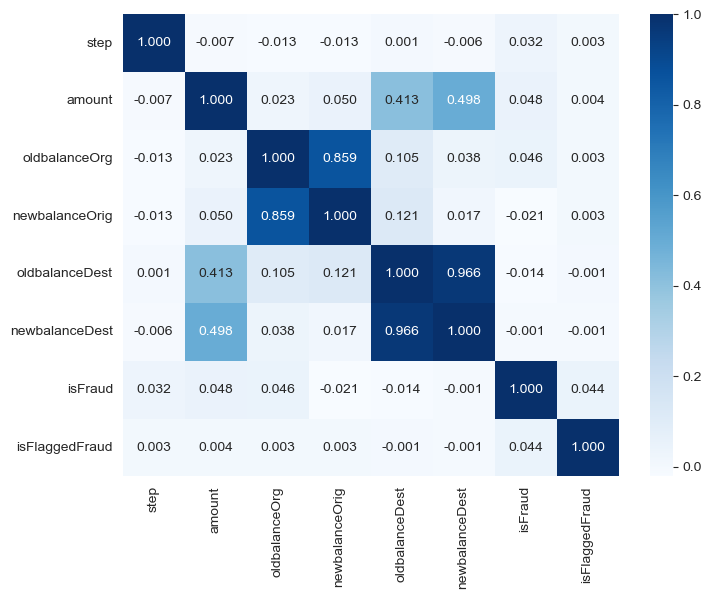

In [179]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [ ]:
# there is trong correlation between newbalanceOrig and oldbalanceOrg
# also, between newbalanceDest and oldbalanceDest
# we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

In [186]:
#model building....
data['type'] = data['type'].map({'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4})


In [194]:
import random
import tensorflow as tf

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [ ]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [ ]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [ ]:
model_comparison_evaluate(classifiers, X_train, y_train)


In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

In [ ]:
#Random Forest obtains the highest score of all using K-fold cross-validation.